In [51]:
import pandas as pd
import numpy as np
from scipy.io import mmread
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
epi_counts = mmread('gene_sorted-Epi.matrix.mtx')


In [3]:
epi_counts_row_names = pd.read_table('Epi.genes.tsv',header=None)
epi_counts_col_names = pd.read_table('Epi.barcodes2.tsv',header=None)

In [4]:
epi_counts_df = pd.DataFrame.sparse.from_spmatrix(epi_counts)

In [5]:
epi_counts_df.columns = epi_counts_col_names
epi_counts_df.index   = epi_counts_row_names
epi_counts_df.head()

,"(N7.EpiA.AAACATACACACTG,)","(N7.EpiA.AAACCGTGCATCAG,)","(N7.EpiA.AAACGCACAATCGC,)","(N7.EpiA.AAAGATCTAACCGT,)","(N7.EpiA.AAAGATCTAGGCGA,)","(N7.EpiA.AAAGCCTGCTCGAA,)","(N7.EpiA.AAATCAACATCACG,)","(N7.EpiA.AAATCAACCTTGGA,)","(N7.EpiA.AAATCATGGAAAGT,)","(N7.EpiA.AAATCCCTCACTTT,)",...,"(N110.LPB.TTTCCTCCATTCTTAC,)","(N110.LPB.TTTCCTCGTCTTGTCC,)","(N110.LPB.TTTCCTCTCTGATTCT,)","(N110.LPB.TTTGCGCGTATGCTTG,)","(N110.LPB.TTTGCGCTCCAGAAGG,)","(N110.LPB.TTTGGTTGTGTGGCTC,)","(N110.LPB.TTTGGTTTCCTTAATC,)","(N110.LPB.TTTGGTTTCTTACCTA,)","(N110.LPB.TTTGTCAAGGATGGAA,)","(N110.LPB.TTTGTCAGTTGTTTGG,)"
"(7SK,)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(A1BG,)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(A1BG-AS1,)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(A1CF,)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
"(A2M,)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
fib_counts           = mmread('gene_sorted-Fib.matrix.mtx')
fib_counts_row_names = pd.read_table('Fib.genes.tsv',header=None)  
fib_counts_col_names = pd.read_table('Fib.barcodes2.tsv',header=None)  

In [7]:
fib_counts_df         = pd.DataFrame.sparse.from_spmatrix(fib_counts)
fib_counts_df.columns = fib_counts_col_names
fib_counts_df.index   = fib_counts_row_names
fib_counts_df.head()

,"(N7.LPA.AAACATACCATTTC,)","(N7.LPA.AAACGCACCCGATA,)","(N7.LPA.AAACGCTGTATCGG,)","(N7.LPA.AAAGACGAGACAGG,)","(N7.LPA.AAAGATCTAGTCTG,)","(N7.LPA.AAATACTGCTGGAT,)","(N7.LPA.AAATCTGAGTTGCA,)","(N7.LPA.AAATGGGAAAGTAG,)","(N7.LPA.AAATGTTGGTTACG,)","(N7.LPA.AACACGTGGAGAGC,)",...,"(N110.LPB.TTCTCAAAGTGCGTGA,)","(N110.LPB.TTCTCAATCCGTTGTC,)","(N110.LPB.TTCTTAGCAGCTATTG,)","(N110.LPB.TTGAACGCAATGACCT,)","(N110.LPB.TTGAACGGTCTGATTG,)","(N110.LPB.TTGCGTCGTCACCTAA,)","(N110.LPB.TTGGAACAGAGCTTCT,)","(N110.LPB.TTGGAACCAATCTACG,)","(N110.LPB.TTGTAGGCAGAGTGTG,)","(N110.LPB.TTTCCTCCATGCAATC,)"
"(7SK,)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(A1BG,)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(A1BG-AS1,)",0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
"(A1CF,)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(A2M,)",0,0,0,1,3,0,0,0,1,3,...,6,37,6,6,28,2,1,0,0,2


In [8]:
imm_counts           = mmread('gene_sorted-Imm.matrix.mtx')
imm_counts_row_names = pd.read_table('Imm.genes.tsv', header=None)
imm_counts_col_names = pd.read_table('Imm.barcodes2.tsv', header = None)

In [9]:
imm_counts_df         = pd.DataFrame.sparse.from_spmatrix(imm_counts)
imm_counts_df.columns = imm_counts_col_names
imm_counts_df.index   = imm_counts_row_names
imm_counts_df.head()

,"(N7.EpiA.AAGGCTACCCTTTA,)","(N7.EpiA.AAGGTGCTACGGAG,)","(N7.EpiA.AAGTAACTTGCTTT,)","(N7.EpiA.ACAATAACCCTCAC,)","(N7.EpiA.ACAGTTCTTCTACT,)","(N7.EpiA.ACGGTCCTGTACGT,)","(N7.EpiA.AGACTCGAAAGGGC,)","(N7.EpiA.ATAAGTACAGATCC,)","(N7.EpiA.ATCTGTTGCTCTAT,)","(N7.EpiA.ATGATATGTGGTTG,)",...,"(N110.LPB.TTTGCGCCAACTTGAC,)","(N110.LPB.TTTGCGCCATGTCGAT,)","(N110.LPB.TTTGCGCTCAACGAAA,)","(N110.LPB.TTTGCGCTCAACGGCC,)","(N110.LPB.TTTGCGCTCTTCAACT,)","(N110.LPB.TTTGGTTAGGATGGTC,)","(N110.LPB.TTTGGTTCACCTCGTT,)","(N110.LPB.TTTGGTTTCGGAAACG,)","(N110.LPB.TTTGTCAGTTGACGTT,)","(N110.LPB.TTTGTCATCTGACCTC,)"
"(7SK,)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(A1BG,)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(A1BG-AS1,)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(A1CF,)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(A2M,)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,1,0,0


In [10]:
cell_subsets = pd.read_table( 'cell_subsets.txt',header=None)

In [11]:
cell_subsets

,0,1
0,Stem,Epithelial
1,TA 1,Epithelial
2,TA 2,Epithelial
3,Cycling TA,Epithelial
4,Immature Enterocytes 1,Epithelial
5,Immature Enterocytes 2,Epithelial
6,Enterocyte Progenitors,Epithelial
7,Enterocytes,Epithelial
8,M cells,Epithelial
9,Best4+ Enterocytes,Epithelial


In [12]:
meta = pd.read_table('all.meta2.txt',header=1)

In [23]:
meta

,TYPE,group,numeric,numeric.1,group.1,group.2,group.3,group.4
0,N7.EpiA.AAACATACACACTG,TA 1,328,891,N7,Non-inflamed,Epi,N7.EpiA
1,N7.EpiA.AAACCGTGCATCAG,TA 1,257,663,N7,Non-inflamed,Epi,N7.EpiA
2,N7.EpiA.AAACGCACAATCGC,TA 2,300,639,N7,Non-inflamed,Epi,N7.EpiA
3,N7.EpiA.AAAGATCTAACCGT,Enterocyte Progenitors,250,649,N7,Non-inflamed,Epi,N7.EpiA
4,N7.EpiA.AAAGATCTAGGCGA,Enterocyte Progenitors,284,769,N7,Non-inflamed,Epi,N7.EpiA
...,...,...,...,...,...,...,...,...
365487,N110.LPB.TTTGGTTAGGATGGTC,Macrophages,635,1366,N110,Inflamed,LP,N110.LPB
365488,N110.LPB.TTTGGTTCACCTCGTT,Plasma,610,2730,N110,Inflamed,LP,N110.LPB
365489,N110.LPB.TTTGGTTTCGGAAACG,Macrophages,859,1979,N110,Inflamed,LP,N110.LPB
365490,N110.LPB.TTTGTCAGTTGACGTT,Macrophages,965,2696,N110,Inflamed,LP,N110.LPB


Cell types are rows and genes are columns

In [28]:
epi_countsT            = epi_counts.transpose()
epi_counts_dfT         = pd.DataFrame.sparse.from_spmatrix(epi_countsT)
epi_counts_dfT.columns = epi_counts_row_names
epi_counts_dfT.index   = epi_counts_col_names
epi_counts_dfT.head()

,"(7SK,)","(A1BG,)","(A1BG-AS1,)","(A1CF,)","(A2M,)","(A2M-AS1,)","(A2ML1,)","(A4GALT,)","(AAAS,)","(AACS,)",...,"(ZYG11B,)","(ZYX,)","(ZZEF1,)","(ZZZ3,)","(hsa-mir-1199,)","(hsa-mir-335,)","(hsa-mir-5195,)","(hsa-mir-6080,)","(hsa-mir-8072,)","(snoU13,)"
"(N7.EpiA.AAACATACACACTG,)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(N7.EpiA.AAACCGTGCATCAG,)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(N7.EpiA.AAACGCACAATCGC,)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(N7.EpiA.AAAGATCTAACCGT,)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(N7.EpiA.AAAGATCTAGGCGA,)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
epi_counts_dfT = epi_counts_dfT.reset_index()
epi_counts_dfT = epi_counts_dfT.rename(columns={'index':'CELL TYPE'})
epi_counts_dfT.head()

,CELL TYPE,"(7SK,)","(A1BG,)","(A1BG-AS1,)","(A1CF,)","(A2M,)","(A2M-AS1,)","(A2ML1,)","(A4GALT,)","(AAAS,)",...,"(ZYG11B,)","(ZYX,)","(ZZEF1,)","(ZZZ3,)","(hsa-mir-1199,)","(hsa-mir-335,)","(hsa-mir-5195,)","(hsa-mir-6080,)","(hsa-mir-8072,)","(snoU13,)"
0,"(N7.EpiA.AAACATACACACTG,)",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"(N7.EpiA.AAACCGTGCATCAG,)",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"(N7.EpiA.AAACGCACAATCGC,)",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"(N7.EpiA.AAAGATCTAACCGT,)",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"(N7.EpiA.AAAGATCTAGGCGA,)",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
epi_counts_dfT['CELL TYPE'] = epi_counts_dfT['CELL TYPE'].apply(lambda x:x[0])
epi_counts_dfT.head()

,CELL TYPE,"(7SK,)","(A1BG,)","(A1BG-AS1,)","(A1CF,)","(A2M,)","(A2M-AS1,)","(A2ML1,)","(A4GALT,)","(AAAS,)",...,"(ZYG11B,)","(ZYX,)","(ZZEF1,)","(ZZZ3,)","(hsa-mir-1199,)","(hsa-mir-335,)","(hsa-mir-5195,)","(hsa-mir-6080,)","(hsa-mir-8072,)","(snoU13,)"
0,N7.EpiA.AAACATACACACTG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,N7.EpiA.AAACCGTGCATCAG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,N7.EpiA.AAACGCACAATCGC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,N7.EpiA.AAAGATCTAACCGT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,N7.EpiA.AAAGATCTAGGCGA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
epi_counts_dfT = pd.merge(epi_counts_dfT,meta,how="left",left_on="CELL TYPE",right_on="TYPE")

In [37]:
epi_counts_dfT.head()

,CELL TYPE,"(7SK,)","(A1BG,)","(A1BG-AS1,)","(A1CF,)","(A2M,)","(A2M-AS1,)","(A2ML1,)","(A4GALT,)","(AAAS,)",...,"(hsa-mir-8072,)","(snoU13,)",TYPE,group,numeric,numeric.1,group.1,group.2,group.3,group.4
0,N7.EpiA.AAACATACACACTG,0,0,0,0,0,0,0,0,0,...,0,0,N7.EpiA.AAACATACACACTG,TA 1,328,891,N7,Non-inflamed,Epi,N7.EpiA
1,N7.EpiA.AAACCGTGCATCAG,0,0,0,0,0,0,0,0,0,...,0,0,N7.EpiA.AAACCGTGCATCAG,TA 1,257,663,N7,Non-inflamed,Epi,N7.EpiA
2,N7.EpiA.AAACGCACAATCGC,0,0,0,0,0,0,0,0,0,...,0,0,N7.EpiA.AAACGCACAATCGC,TA 2,300,639,N7,Non-inflamed,Epi,N7.EpiA
3,N7.EpiA.AAAGATCTAACCGT,0,0,0,0,0,0,0,0,0,...,0,0,N7.EpiA.AAAGATCTAACCGT,Enterocyte Progenitors,250,649,N7,Non-inflamed,Epi,N7.EpiA
4,N7.EpiA.AAAGATCTAGGCGA,0,0,0,0,0,0,0,0,0,...,0,0,N7.EpiA.AAAGATCTAGGCGA,Enterocyte Progenitors,284,769,N7,Non-inflamed,Epi,N7.EpiA


In [74]:
cellTypes = pd.DataFrame( {'CELL TYPE': list(set(epi_counts_dfT['CELL TYPE'])) }).reset_index()
cellTypes

,index,CELL TYPE
0,0,N10.EpiB.ACAAGAGACTCTTA
1,1,N51.EpiB.GATGAAACAAGGGTCA
2,2,N52.LPA2a.TATGCCCTCTATGTGG
3,3,N46.EpiA.GCATGATAGCCATCGC
4,4,N24.LPA.GTCAAGTGTCTAAACC
...,...,...
123001,123001,N110.EpiA.TCGTAGAGTTGAACTC
123002,123002,N14.LPB.CAGACAACTAGAGA
123003,123003,N49.LPA.GTCATTTTCTCTAAGG
123004,123004,N23.EpiA.ACTATCTCAGCTTCGG


In [69]:
epi_sample = epi_counts_dfT.sample(n=100,random_state=1)
epi_sample.head()

,CELL TYPE,"(7SK,)","(A1BG,)","(A1BG-AS1,)","(A1CF,)","(A2M,)","(A2M-AS1,)","(A2ML1,)","(A4GALT,)","(AAAS,)",...,"(hsa-mir-8072,)","(snoU13,)",TYPE,group,numeric,numeric.1,group.1,group.2,group.3,group.4
72581,N51.EpiA.CAGCTGGAGAGTTGGC,0,0,0,0,0,0,0,0,0,...,0,0,N51.EpiA.CAGCTGGAGAGTTGGC,TA 1,317,635,N51,Healthy,Epi,N51.EpiA
31156,N16.EpiA.CCCAACACTAGACC,0,0,0,1,0,0,0,0,0,...,0,0,N16.EpiA.CCCAACACTAGACC,Cycling TA,1729,5745,N16,Healthy,Epi,N16.EpiA
4908,N9.EpiA.TGAATAACGGTCAT,0,0,0,0,0,0,0,0,0,...,0,0,N9.EpiA.TGAATAACGGTCAT,TA 1,269,506,N9,Non-inflamed,Epi,N9.EpiA
97666,N58.LPA2.GGGATGATCAAGATCC,0,0,0,0,0,0,0,0,0,...,0,0,N58.LPA2.GGGATGATCAAGATCC,TA 1,341,681,N58,Non-inflamed,LP,N58.LPA2
83112,N52.LPA1a.TGACTTTCAAACGCGA,0,0,0,0,0,0,0,0,0,...,0,0,N52.LPA1a.TGACTTTCAAACGCGA,TA 1,475,2372,N52,Non-inflamed,LP,N52.LPA1a


In [70]:
tsneMod=TSNE()

Only get the columns that are genes

In [71]:
geneColumns = set(epi_sample.columns) - set(['CELL TYPE','TYPE','group','numeric','numeric.1','group.1','group.2','group.3','group.4'])
geneDf = epi_sample[list(geneColumns)]
geneDf.head()

,"(RP11-214N9.1,)","(MIER3,)","(PIEZO2,)","(IFT46,)","(RP1-86D1.2,)","(ZNF417,)","(C19orf10,)","(CTB-32O4.2,)","(KRTAP13-2,)","(SP6,)",...,"(ACTR6,)","(ADRBK2,)","(SUCLG1,)","(C2CD4B,)","(CKLF,)","(WDHD1,)","(TLK1,)","(A4GALT,)","(PAIP2B,)","(ADAT1,)"
72581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31156,0,0,0,0,0,0,0,0,0,0,...,0,0,7,0,0,0,0,0,0,0
4908,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97666,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
83112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
tsneAxes = tsneMod.fit_transform(geneDf)
tsneAxes

array([[ 27.574415  , -15.111447  ],
       [ 92.84112   ,  -3.6104238 ],
       [ 34.828518  , -43.263336  ],
       [ 50.709072  , -14.074663  ],
       [-42.75576   ,   7.167642  ],
       [-71.149925  ,  26.589828  ],
       [  3.4397423 , -20.832384  ],
       [ 58.642197  , -57.64513   ],
       [-24.908142  ,   2.3094437 ],
       [ 18.027231  , -36.090885  ],
       [ 12.181692  ,  -8.633815  ],
       [ 25.793772  ,   3.6049285 ],
       [ 62.36016   , -46.23863   ],
       [ 45.6142    ,  44.64997   ],
       [-83.81732   ,  62.586132  ],
       [-26.256056  ,  78.06157   ],
       [-26.18873   ,  -7.2406955 ],
       [-24.525145  ,  58.40186   ],
       [-37.698837  ,  71.1321    ],
       [ 51.439075  , -23.786095  ],
       [ 27.955736  ,  -1.4044124 ],
       [-28.14459   ,  28.330368  ],
       [-36.186893  ,  59.48228   ],
       [ 71.945404  ,  -0.84789556],
       [ 47.23484   , -61.022934  ],
       [ -4.7928925 , -10.541494  ],
       [-10.08925   , -24.277517  ],
 

In [73]:
epi_sample[['TSNE1','TSNE2']] = tsneAxes
epi_sample.head()

,CELL TYPE,"(7SK,)","(A1BG,)","(A1BG-AS1,)","(A1CF,)","(A2M,)","(A2M-AS1,)","(A2ML1,)","(A4GALT,)","(AAAS,)",...,TYPE,group,numeric,numeric.1,group.1,group.2,group.3,group.4,TSNE1,TSNE2
72581,N51.EpiA.CAGCTGGAGAGTTGGC,0,0,0,0,0,0,0,0,0,...,N51.EpiA.CAGCTGGAGAGTTGGC,TA 1,317,635,N51,Healthy,Epi,N51.EpiA,27.574415,-15.111447
31156,N16.EpiA.CCCAACACTAGACC,0,0,0,1,0,0,0,0,0,...,N16.EpiA.CCCAACACTAGACC,Cycling TA,1729,5745,N16,Healthy,Epi,N16.EpiA,92.841118,-3.610424
4908,N9.EpiA.TGAATAACGGTCAT,0,0,0,0,0,0,0,0,0,...,N9.EpiA.TGAATAACGGTCAT,TA 1,269,506,N9,Non-inflamed,Epi,N9.EpiA,34.828518,-43.263336
97666,N58.LPA2.GGGATGATCAAGATCC,0,0,0,0,0,0,0,0,0,...,N58.LPA2.GGGATGATCAAGATCC,TA 1,341,681,N58,Non-inflamed,LP,N58.LPA2,50.709072,-14.074663
83112,N52.LPA1a.TGACTTTCAAACGCGA,0,0,0,0,0,0,0,0,0,...,N52.LPA1a.TGACTTTCAAACGCGA,TA 1,475,2372,N52,Non-inflamed,LP,N52.LPA1a,-42.755760,7.167642


In [75]:
epi_sample = pd.merge(epi_sample, cellTypes, on='CELL TYPE', how='left')
epi_sample.head()

,CELL TYPE,"(7SK,)","(A1BG,)","(A1BG-AS1,)","(A1CF,)","(A2M,)","(A2M-AS1,)","(A2ML1,)","(A4GALT,)","(AAAS,)",...,group,numeric,numeric.1,group.1,group.2,group.3,group.4,TSNE1,TSNE2,index
0,N51.EpiA.CAGCTGGAGAGTTGGC,0,0,0,0,0,0,0,0,0,...,TA 1,317,635,N51,Healthy,Epi,N51.EpiA,27.574415,-15.111447,82242
1,N16.EpiA.CCCAACACTAGACC,0,0,0,1,0,0,0,0,0,...,Cycling TA,1729,5745,N16,Healthy,Epi,N16.EpiA,92.841118,-3.610424,87611
2,N9.EpiA.TGAATAACGGTCAT,0,0,0,0,0,0,0,0,0,...,TA 1,269,506,N9,Non-inflamed,Epi,N9.EpiA,34.828518,-43.263336,37000
3,N58.LPA2.GGGATGATCAAGATCC,0,0,0,0,0,0,0,0,0,...,TA 1,341,681,N58,Non-inflamed,LP,N58.LPA2,50.709072,-14.074663,39603
4,N52.LPA1a.TGACTTTCAAACGCGA,0,0,0,0,0,0,0,0,0,...,TA 1,475,2372,N52,Non-inflamed,LP,N52.LPA1a,-42.755760,7.167642,40743


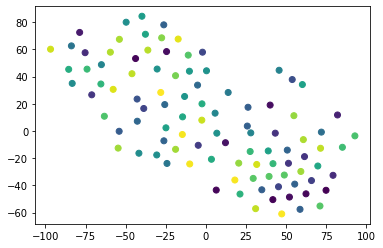

In [76]:
fig,ax = plt.subplots()
ax.scatter(epi_sample['TSNE1'],epi_sample['TSNE2'],c=epi_sample['index'])

In [77]:
def reshapeMatrix(matrix,genes,cellTypes):
    epi_countsT            = matrix.transpose()
    epi_counts_dfT         = pd.DataFrame.sparse.from_spmatrix(epi_countsT)
    epi_counts_dfT.columns = genes
    epi_counts_dfT.index   = cellTypes
    return epi_counts_dfT

In [80]:
fib_counts_dfT = reshapeMatrix(fib_counts,fib_counts_row_names,fib_counts_col_names)
fib_counts_dfT.head()

,"(7SK,)","(A1BG,)","(A1BG-AS1,)","(A1CF,)","(A2M,)","(A2M-AS1,)","(A2ML1,)","(A4GALT,)","(AAAS,)","(AACS,)",...,"(ZXDC,)","(ZYG11A,)","(ZYG11B,)","(ZYX,)","(ZZEF1,)","(ZZZ3,)","(hsa-mir-1199,)","(hsa-mir-6080,)","(hsa-mir-8072,)","(snoU13,)"
"(N7.LPA.AAACATACCATTTC,)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(N7.LPA.AAACGCACCCGATA,)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
"(N7.LPA.AAACGCTGTATCGG,)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(N7.LPA.AAAGACGAGACAGG,)",0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(N7.LPA.AAAGATCTAGTCTG,)",0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [81]:
def formatCellTypeColumn(matrix):
    epi_counts_dfT = matrix.reset_index()
    epi_counts_dfT = epi_counts_dfT.rename(columns={'index':'CELL TYPE'})
    epi_counts_dfT['CELL TYPE'] = epi_counts_dfT['CELL TYPE'].apply(lambda x:x[0])
    return epi_counts_dfT

In [82]:
fib_counts_dfT = formatCellTypeColumn(fib_counts_dfT)
fib_counts_dfT.head()

,CELL TYPE,"(7SK,)","(A1BG,)","(A1BG-AS1,)","(A1CF,)","(A2M,)","(A2M-AS1,)","(A2ML1,)","(A4GALT,)","(AAAS,)",...,"(ZXDC,)","(ZYG11A,)","(ZYG11B,)","(ZYX,)","(ZZEF1,)","(ZZZ3,)","(hsa-mir-1199,)","(hsa-mir-6080,)","(hsa-mir-8072,)","(snoU13,)"
0,N7.LPA.AAACATACCATTTC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,N7.LPA.AAACGCACCCGATA,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,N7.LPA.AAACGCTGTATCGG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,N7.LPA.AAAGACGAGACAGG,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,N7.LPA.AAAGATCTAGTCTG,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [83]:
def joinWithMetaData(matrix,meta):
    matrix = pd.merge(matrix,meta,how="left",left_on="CELL TYPE",right_on="TYPE")
    return matrix

In [84]:
fib_counts_dfT = joinWithMetaData(fib_counts_dfT,meta)
fib_counts_dfT.head()

,CELL TYPE,"(7SK,)","(A1BG,)","(A1BG-AS1,)","(A1CF,)","(A2M,)","(A2M-AS1,)","(A2ML1,)","(A4GALT,)","(AAAS,)",...,"(hsa-mir-8072,)","(snoU13,)",TYPE,group,numeric,numeric.1,group.1,group.2,group.3,group.4
0,N7.LPA.AAACATACCATTTC,0,0,0,0,0,0,0,0,0,...,0,0,N7.LPA.AAACATACCATTTC,WNT2B+ Fos-lo 1,550,1118,N7,Non-inflamed,LP,N7.LPA
1,N7.LPA.AAACGCACCCGATA,0,0,0,0,0,0,0,0,0,...,0,0,N7.LPA.AAACGCACCCGATA,Myofibroblasts,303,516,N7,Non-inflamed,LP,N7.LPA
2,N7.LPA.AAACGCTGTATCGG,0,0,0,0,0,0,0,0,0,...,0,0,N7.LPA.AAACGCTGTATCGG,Myofibroblasts,636,1312,N7,Non-inflamed,LP,N7.LPA
3,N7.LPA.AAAGACGAGACAGG,0,0,0,0,1,0,0,0,0,...,0,0,N7.LPA.AAAGACGAGACAGG,WNT2B+ Fos-hi,1030,2594,N7,Non-inflamed,LP,N7.LPA
4,N7.LPA.AAAGATCTAGTCTG,0,0,0,0,3,0,0,0,0,...,0,0,N7.LPA.AAAGATCTAGTCTG,WNT2B+ Fos-hi,707,1769,N7,Non-inflamed,LP,N7.LPA


In [85]:
def numberCodeCellTypes(epi_counts_dfT):
    cellTypes = pd.DataFrame( {'CELL TYPE': list(set(epi_counts_dfT['CELL TYPE'])) }).reset_index()
    epi_counts_dfT = pd.merge(epi_counts_dfT, cellTypes, on='CELL TYPE', how='left')
    return epi_counts_dfT

In [86]:
fib_counts_dfT = numberCodeCellTypes(fib_counts_dfT)
fib_counts_dfT.head()

,CELL TYPE,"(7SK,)","(A1BG,)","(A1BG-AS1,)","(A1CF,)","(A2M,)","(A2M-AS1,)","(A2ML1,)","(A4GALT,)","(AAAS,)",...,"(snoU13,)",TYPE,group,numeric,numeric.1,group.1,group.2,group.3,group.4,index
0,N7.LPA.AAACATACCATTTC,0,0,0,0,0,0,0,0,0,...,0,N7.LPA.AAACATACCATTTC,WNT2B+ Fos-lo 1,550,1118,N7,Non-inflamed,LP,N7.LPA,18473
1,N7.LPA.AAACGCACCCGATA,0,0,0,0,0,0,0,0,0,...,0,N7.LPA.AAACGCACCCGATA,Myofibroblasts,303,516,N7,Non-inflamed,LP,N7.LPA,16359
2,N7.LPA.AAACGCTGTATCGG,0,0,0,0,0,0,0,0,0,...,0,N7.LPA.AAACGCTGTATCGG,Myofibroblasts,636,1312,N7,Non-inflamed,LP,N7.LPA,8669
3,N7.LPA.AAAGACGAGACAGG,0,0,0,0,1,0,0,0,0,...,0,N7.LPA.AAAGACGAGACAGG,WNT2B+ Fos-hi,1030,2594,N7,Non-inflamed,LP,N7.LPA,22677
4,N7.LPA.AAAGATCTAGTCTG,0,0,0,0,3,0,0,0,0,...,0,N7.LPA.AAAGATCTAGTCTG,WNT2B+ Fos-hi,707,1769,N7,Non-inflamed,LP,N7.LPA,13301


In [87]:
def addTsneColumns(epi_sample):
    geneColumns = set(epi_sample.columns) - set(['CELL TYPE','TYPE','group','numeric','numeric.1','group.1','group.2','group.3','group.4'])
    geneDf = epi_sample[list(geneColumns)]
    tsneMod=TSNE()
    tsneAxes = tsneMod.fit_transform(geneDf)
    epi_sample[['TSNE1','TSNE2']] = tsneAxes
    return epi_sample

In [89]:
fib_sample = fib_counts_dfT.sample(n=100,random_state=1)
fib_sample = addTsneColumns(fib_sample)
fib_sample.head()

C:\Users\Walter\anaconda3\envs\ML7331\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\Walter\anaconda3\envs\ML7331\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


,CELL TYPE,"(7SK,)","(A1BG,)","(A1BG-AS1,)","(A1CF,)","(A2M,)","(A2M-AS1,)","(A2ML1,)","(A4GALT,)","(AAAS,)",...,group,numeric,numeric.1,group.1,group.2,group.3,group.4,index,TSNE1,TSNE2
26602,N46.LPB.GATTCAGTCCGGGTGT,0,0,0,0,0,0,0,0,0,...,WNT5B+ 1,1136,2136,N46,Healthy,LP,N46.LPB,17770,2.803396,0.403804
14555,N52.LPA2a.AAGGCAGAGGCTATCT,0,0,0,0,1,0,0,0,0,...,WNT2B+ Fos-hi,1503,3908,N52,Non-inflamed,LP,N52.LPA2a,21714,4.931547,2.521227
15293,N52.LPB2b.CGATTGAGTGAGGGTT,0,0,0,0,3,0,0,0,0,...,WNT5B+ 2,1099,2688,N52,Inflamed,LP,N52.LPB2b,19195,3.595840,1.143358
26880,N49.LPA.ACTGAACCATGATCCA,0,0,0,0,4,0,0,0,0,...,WNT5B+ 2,2414,7398,N49,Non-inflamed,LP,N49.LPA,5643,-2.597510,-4.541370
2321,N10.LPA.GCATTGGACACAAC,0,0,0,0,0,1,0,0,0,...,WNT2B+ Fos-lo 1,754,1558,N10,Healthy,LP,N10.LPA,13765,0.827453,-1.474405


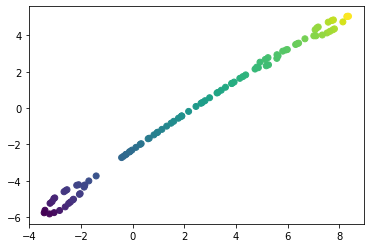

In [90]:
fig,ax = plt.subplots()
ax.scatter(fib_sample['TSNE1'],fib_sample['TSNE2'],c=fib_sample['index'])

In [91]:
def formatMatrix(matrix,genes,cellTypes, meta):
    matrix = reshapeMatrix(matrix,genes,cellTypes)
    matrix = formatCellTypeColumn(matrix)
    matrix = joinWithMetaData(matrix,meta)
    matrix = numberCodeCellTypes(matrix)
    return matrix

In [92]:
imm_counts_dfT = formatMatrix(imm_counts,imm_counts_row_names,imm_counts_col_names,meta)
imm_counts_dfT.head()

,CELL TYPE,"(7SK,)","(A1BG,)","(A1BG-AS1,)","(A1CF,)","(A2M,)","(A2M-AS1,)","(A2ML1,)","(A4GALT,)","(AAAS,)",...,"(snoU13,)",TYPE,group,numeric,numeric.1,group.1,group.2,group.3,group.4,index
0,N7.EpiA.AAGGCTACCCTTTA,0,0,0,0,0,0,0,0,0,...,0,N7.EpiA.AAGGCTACCCTTTA,Plasma,624,7433,N7,Non-inflamed,Epi,N7.EpiA,88500
1,N7.EpiA.AAGGTGCTACGGAG,0,0,0,0,0,0,0,0,0,...,0,N7.EpiA.AAGGTGCTACGGAG,CD8+ IELs,558,1904,N7,Non-inflamed,Epi,N7.EpiA,153719
2,N7.EpiA.AAGTAACTTGCTTT,0,0,0,0,0,0,0,0,0,...,0,N7.EpiA.AAGTAACTTGCTTT,CD8+ IELs,437,1366,N7,Non-inflamed,Epi,N7.EpiA,151258
3,N7.EpiA.ACAATAACCCTCAC,0,0,0,0,0,0,0,0,0,...,0,N7.EpiA.ACAATAACCCTCAC,Plasma,484,5161,N7,Non-inflamed,Epi,N7.EpiA,105716
4,N7.EpiA.ACAGTTCTTCTACT,0,0,0,0,0,0,0,0,0,...,0,N7.EpiA.ACAGTTCTTCTACT,CD8+ IELs,470,1408,N7,Non-inflamed,Epi,N7.EpiA,181761
